# IMPORTS

In [2]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
!pip install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -y


In [3]:
!pip uninstall -y torch, torchtext
!pip install torch==2.0.1 torchtext==0.15.2
!pip install gensim #4.2.0
!pip install portalocker>=2.0.0
!pip install -Uq torchtext #
!pip install -Uq torch
!pip install -Uq torchdata

ERROR: Invalid requirement: 'torch,': Expected end or semicolon (after name and no valid version specifier)
    torch,
         ^
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 7.9 MB/s eta 0:0

In [5]:
!pip uninstall torchtext
!pip install torchtext==0.15.2

Found existing installation: torchtext 0.18.0
Uninstalling torchtext-0.18.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/torchtext-0.18.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torchtext/*
Proceed (Y/n)? y
  Successfully uninstalled torchtext-0.18.0
  Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl.metadata (7.4 kB)
  Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl.metadata (24 kB)
  Using cached torchdata-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached triton-2.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.0 kB)
Using cached torchtext-0.15.2-cp310-cp310-manylinux1_x86_64.whl (2.0 MB)
Using cached torch-2.0.1-cp310-cp310-manylinux1_x86_64.whl (619.9 MB)
Using cached torchdata-0.6.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.6 MB)
Using cached triton-2.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  At

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

from IPython.core.display import display, SVG


from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import Dataset


import logging
from gensim.models import Word2Vec
from collections import defaultdict
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.vocab import GloVe,vocab
from torchdata.datapipes.iter import IterableWrapper, Mapper
from torchtext.datasets import AG_NEWS
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset
from torchtext.data.utils import get_tokenizer
from torch.utils.data import DataLoader
from tqdm import tqdm

%matplotlib inline

# You can also use this section to suppress warnings generated by your code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

We are goint to use glove embedding to clasify text data into topic

# BUILD VOCAB AND TOKENIZER

In [2]:
from torchtext.vocab import GloVe,vocab

In [3]:
# creating an instance of the 6B version of Glove() model
glove_vectors_6B = GloVe(name ='6B') # you can specify the model with the following format: GloVe(name='840B', dim=300)

.vector_cache/glove.6B.zip: 862MB [02:41, 5.33MB/s]                           
100%|█████████▉| 399999/400000 [01:10<00:00, 5673.87it/s]


In [4]:
# Build vocab from glove_vectors
# vocab(ordered_dict: Dict, min_freq: int = 1, specials: Optional[List[str]] = None)
vocab = vocab(glove_vectors_6B.stoi, 0,specials=('<unk>', '<pad>'))
vocab.set_default_index(vocab["<unk>"])

In [6]:
# Define tokenizer

tokenizer = get_tokenizer("basic_english")

# DATA READY

In [7]:
# Split the dataset into training and testing iterators.
train_iter, test_iter = AG_NEWS()

# Convertimos a map style para poder entrenar con ellos.
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)

# Determine the number of samples to be used for training and validation (5% for validation).
num_train = int(len(train_dataset) * 0.85)

# Randomly split the training dat aset into training and validation datasets using `random_split`.
# The training dataset will contain 95% of the samples, and the validation dataset will contain the remaining 5%.
split_train_, split_valid_ = random_split(train_dataset, [num_train, len(train_dataset) - num_train])

Obtenemos las clases primero

In [8]:
# define class labels
ag_news_label = {1: "World", 2: "Sports", 3: "Business", 4: "Sci/Tec"}
'''ag_news_label[y]'''
num_class = len(set([label for (label, text) in train_iter ]))

Creamos la función collate

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## COLLATE FUNCTION

In [11]:
def text_pipeline(x):
    x=x.lower()# you need this as your vocab is in lower case
    return vocab(tokenizer(x))

def label_pipeline(x):
    return int(x) - 1

# create label, text and offset for each batch of data
# text is the concatenated text for all text data in the batch
# you need to have the offsets(the end of text index) for later when you separate texts and predict their label
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for _label, _text in batch:
        label_list.append(label_pipeline(_label))
        processed_text = torch.tensor(text_pipeline(_text), dtype=torch.int64)
        text_list.append(processed_text)
        offsets.append(processed_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(device), text_list.to(device), offsets.to(device)

## DATA LOADERS

In [12]:
BATCH_SIZE = 64

train_dataloader = DataLoader(
    split_train_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch
)
valid_dataloader = DataLoader(
    split_valid_, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch
)
test_dataloader = DataLoader(
    test_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_batch
)

In [13]:
label, text, offsets=next(iter(train_dataloader ))
print(label, text, offsets)
label.shape, text.shape, offsets.shape

tensor([1, 2, 0, 0, 0, 3, 2, 2, 1, 3, 0, 2, 1, 0, 2, 1, 2, 3, 0, 2, 2, 3, 0, 1,
        1, 3, 3, 1, 3, 3, 3, 1, 0, 3, 1, 3, 0, 1, 2, 3, 1, 1, 0, 2, 1, 1, 1, 2,
        0, 0, 1, 3, 0, 2, 2, 2, 3, 3, 1, 1, 1, 2, 3, 0]) tensor([ 9887, 13644,     5,  ...,  4547,    18,     4]) tensor([   0,   63,  112,  144,  196,  254,  285,  327,  373,  399,  453,  505,
         565,  605,  659,  701,  744,  777,  813,  858,  904,  936,  965, 1009,
        1048, 1093, 1133, 1196, 1280, 1325, 1363, 1391, 1458, 1506, 1542, 1607,
        1643, 1675, 1715, 1746, 1780, 1842, 1871, 1918, 1954, 2003, 2036, 2073,
        2126, 2208, 2249, 2298, 2341, 2380, 2412, 2473, 2513, 2568, 2605, 2652,
        2695, 2736, 2766, 2800, 2846])


(torch.Size([64]), torch.Size([2846]), torch.Size([65]))

# TRAIN THE MODEL

## DEFINE THE MODEL

In [14]:
class TextClassificationModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_class):
        super(TextClassificationModel, self).__init__()
        self.embedding = torch.nn.Embedding.from_pretrained(glove_vectors_6B.vectors,freeze=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text,offsets):
        embedded = self.embedding(text)
        # you get the average of word embeddings in the text
        means = []
        for i in range(1,len(offsets)):
            #this is like eme
          text_tmp = embedded[offsets[i-1]:offsets[i]]
          means.append(text_tmp.mean(0))

        return self.fc(torch.stack(means))

In [15]:
def evaluate(dataloader):
    model.eval()
    total_acc, total_count= 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = model(text,offsets)

            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc / total_count

In [16]:
# Define hyperparameters
vocab_size=len(vocab)
embedding_dim = 300
# Initialize the model
model = TextClassificationModel(vocab_size, embedding_dim, num_class).to(device)

## TRAIN

In [17]:
def train_TextClassification(model, dataloader, criterion, optimizer, epochs=10):

    # Lista para almacenar la pérdida acumulativa por época
    cum_loss_list = []
    # Lista para almacenar la precisión por época
    acc_epoch = []
    # Inicializamos la mejor precisión anterior
    acc_old = 0

    # Bucle principal para entrenar durante un número de épocas especificado
    for epoch in tqdm(range(1, epochs + 1)):  # tqdm agrega una barra de progreso
        model.train()  # Configuramos el modelo en modo de entrenamiento
        cum_loss = 0  # Inicializamos la pérdida acumulativa para esta época

        # Iteramos sobre los lotes de datos del dataloader
        for idx, (label, text, offsets) in enumerate(train_dataloader):
            optimizer.zero_grad()  # Reiniciamos los gradientes acumulados del optimizador

            # Obtenemos las predicciones del modelo
            predicted_label = model(text, offsets)

            # Calculamos la pérdida entre las predicciones y las etiquetas reales
            loss = criterion(predicted_label, label)
            loss.backward()  # Propagamos hacia atrás los gradientes

            # Clipping de gradientes para evitar explosión de gradientes
            torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)

            optimizer.step()  # Actualizamos los parámetros del modelo
            cum_loss += loss.item()  # Acumulamos la pérdida de este lote

        # Calculamos la pérdida promedio de la época y la almacenamos
        cum_loss_list.append(cum_loss / len(train_dataloader))

        # Evaluamos el modelo en el conjunto de validación
        accu_val = evaluate(valid_dataloader)  # Función externa que calcula precisión en validación
        acc_epoch.append(accu_val)  # Guardamos la precisión de esta época

        # Guardamos el modelo si tiene la mejor precisión en validación
        if accu_val > acc_old:
            acc_old = accu_val  # Actualizamos la mejor precisión conocida
            torch.save(model.state_dict(), 'my_model.pth')  # Guardamos los pesos del modelo

    # Retornamos el modelo entrenado, las pérdidas acumuladas y las precisiones por época
    return model, cum_loss_list, acc_epoch


In [22]:
# Define hyperparameters
LR=0.1
EPOCHS = 15


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)

model,cum_loss_list,acc_epoch  = train_TextClassification(model,train_dataloader,criterion,optimizer,EPOCHS)

100%|██████████| 15/15 [05:53<00:00, 23.58s/it]


In [23]:
import matplotlib.pyplot as plt
def plot(COST,ACC):
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(COST, color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis='y', color=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # you already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped

    plt.show()

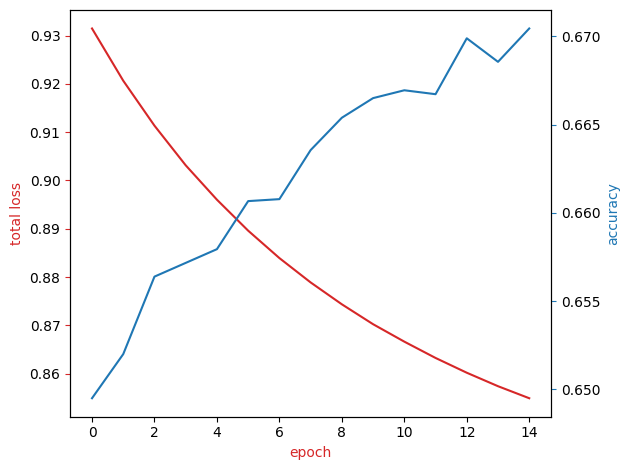

In [24]:
plot(cum_loss_list,acc_epoch)

In [25]:
evaluate(test_dataloader)

0.6656578947368421